## Supervised Learning

### Classification and Regression

An easy way to distinguish between classification and regression is to ask whether there is some kind of continuity in the output

### Generalization, Overfitting, and Underfitting

The only meature of whether an algorithm will perform well on new data is the evaluation on the test set.
However, intuitively we expect simple models to generalize better to new data, we always want to find the simplest model.

* Overfitting: model is too complex
* Underfitting: model is not complex enough

The larger variance of data points your dataset contains, the more complex a model you can use without overfitting

Having more data and building apporipriately more complex models can often work wonders for supervised learning tasks.
In the real world, you often have the ability to decide how much data to collect, which might be more beneficial than tweaking and tuning your model. Never underestimate the power of more data.

### Some sample datasets

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import mglearn

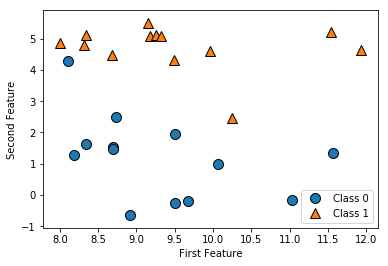

In [2]:
X, y = mglearn.datasets.make_forge()
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(['Class 0', 'Class 1'], loc=4)
plt.xlabel('First Feature')
plt.ylabel('Second Feature')
plt.show()

In [3]:
X.shape, y.shape

((26, 2), (26,))

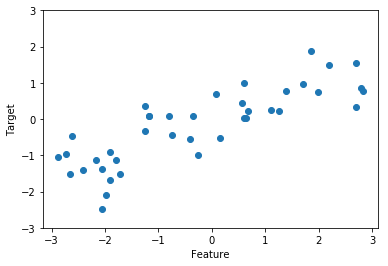

In [4]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel('Feature')
plt.ylabel('Target')
plt.show()

In [5]:
from sklearn.datasets import load_breast_cancer

In [6]:
cancer = load_breast_cancer()

In [7]:
print('cancer.keys():\n{}'.format(cancer.keys()))

cancer.keys():
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [8]:
cancer.data.shape, cancer.target.shape

((569, 30), (569,))

In [9]:
print('Feature names:\n{}'.format(cancer.feature_names))

Feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [10]:
from sklearn.datasets import load_boston

In [11]:
boston = load_boston()

In [12]:
boston.data.shape, boston.target.shape

((506, 13), (506,))

In [13]:
print('Feature names:\n{}'.format(boston.feature_names))

Feature names:
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [14]:
X, y = mglearn.datasets.load_extended_boston()
print('X.shape:{}'.format(X.shape))

X.shape:(506, 104)


### The machine learning algorithms

#### K-neighbors classification

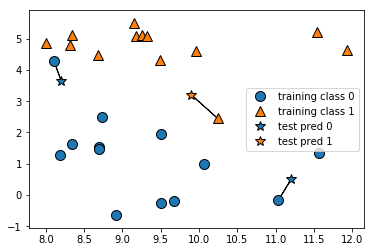

In [15]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

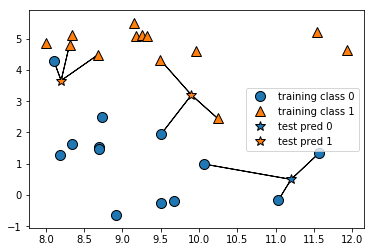

In [16]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [21]:
print('Test set predictions: {}'.format(clf.predict(X_test)))

Test set predictions: [1 0 1 0 1 0 0]


In [22]:
print('Test set accuracy: {:.2f}'.format(clf.score(X_test, y_test)))

Test set accuracy: 0.86


#### The decision boundary

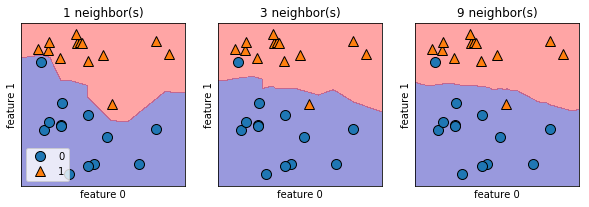

In [23]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=0.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title('{} neighbor(s)'.format(n_neighbors))
    ax.set_xlabel('feature 0')
    ax.set_ylabel('feature 1')
axes[0].legend(loc=3)
plt.show()

A smoother boundary corresponds to a simpler model. In other words, using few neighbors corresponds to high model complexity, and using many neighbors corresponds to low model complexity.

In [24]:
from sklearn.datasets import load_breast_cancer

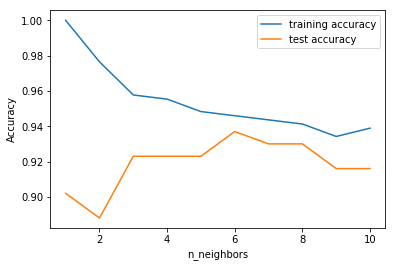

In [25]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label='training accuracy')
plt.plot(neighbors_settings, test_accuracy, label='test accuracy')
plt.ylabel('Accuracy')
plt.xlabel('n_neighbors')
plt.legend()
plt.show()

### K-neighbors regression

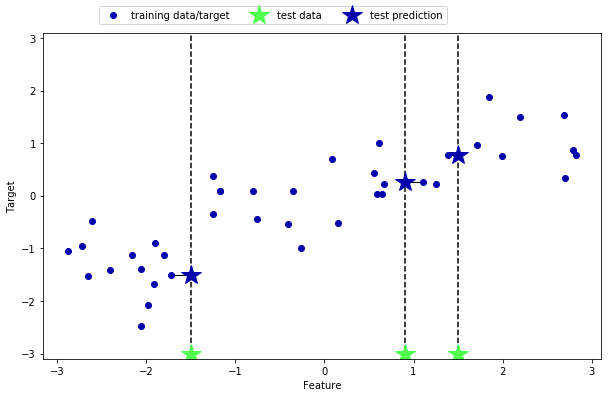

In [26]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

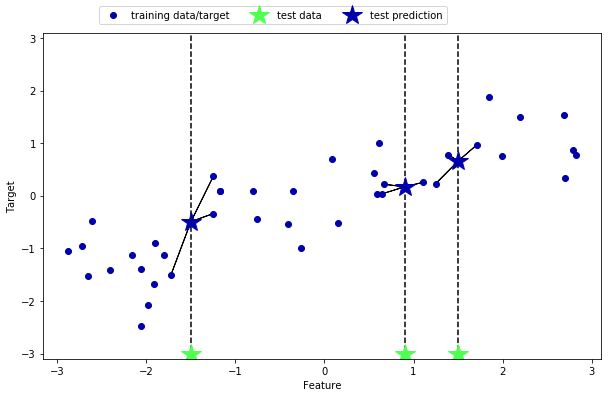

In [27]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [28]:
from sklearn.neighbors import KNeighborsRegressor

In [29]:
X, y = mglearn.datasets.make_wave(n_samples=40)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X, y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=3, p=2,
          weights='uniform')

In [30]:
print('Test set predictions:\n{}'.format(reg.predict(X_test)))

Test set predictions:
[ 0.03885648  0.41779483  1.19926374 -1.98183861 -1.18120831 -1.55460707
  0.49062028  0.6597075  -0.47777954 -0.9859799 ]


In [31]:
print('Test set R^2: {:.2f}'.format(reg.score(X_test, y_test)))

Test set R^2: 0.84


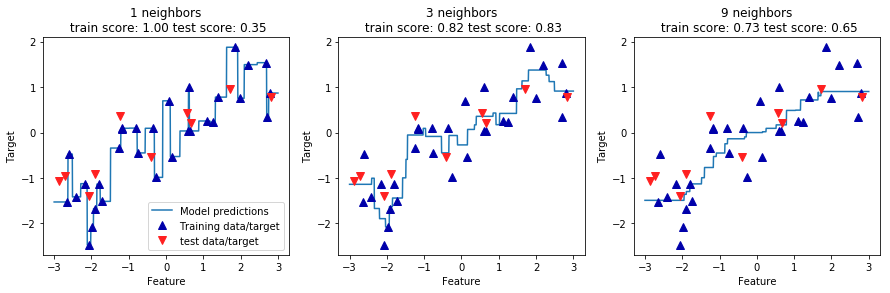

In [32]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
line = np.linspace(-3, 3, 1000).reshape(-1, 1)

for n_neighbors, ax in zip([1, 3, 9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors).fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    ax.set_title('{} neighbors\n train score: {:.2f} test score: {:.2f}'.format(n_neighbors,
                                                                                reg.score(X_train, y_train),
                                                                                reg.score(X_test, y_test)))
    ax.set_xlabel('Feature')
    ax.set_ylabel('Target')
axes[0].legend(['Model predictions', 'Training data/target', 'test data/target'], loc='best')
plt.show()

#### Two importance parameters to the KNeighbors classifier:
* the number of neighbors
* how you measure distance between data points

#### Strength:
* easy to understand
* often gives reasonable performance without a lot of adjustments
* a good baseline
* training is very fast

#### weakness:
* testing is very slow
* perform badly when number of feature get large or most features are 0

### Linear models

#### Linear model for regression

w[0]: 0.393906  b: -0.031804


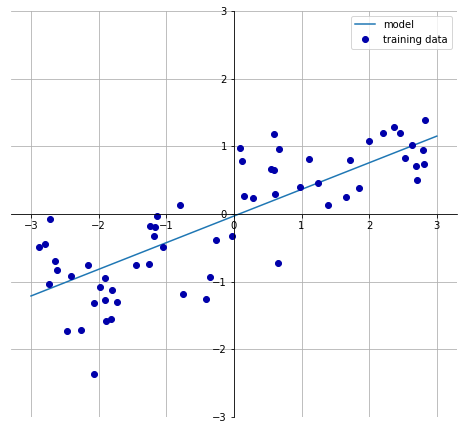

In [33]:
mglearn.plots.plot_linear_regression_wave()

It is a strong assumption that our target y is a linear combination of the features. But linear model can be very powerful fot datasets with many features.

#### Difference between linear models:
* how w and b are learned
* how model complexity can be controlled

#### Linear regression

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)

In [36]:
print('lr.coef_: {}'.format(lr.coef_))
print('lr.intercept_: {}'.format(lr.intercept_))

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


In [37]:
print('Training set score: {:.2f}'.format(lr.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(lr.score(X_test, y_test)))

Training set score: 0.67
Test set score: 0.66


In [38]:
# Training score and test score being close together means we are not overfitting

In [39]:
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [40]:
print('Training set score: {:.2f}'.format(lr.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.61


In [41]:
# This discrepancy between performance on the training set and test set is a clear sign of overfitting

#### Ridge Regression: L2 regularization

In [42]:
from sklearn.linear_model import Ridge

In [43]:
ridge = Ridge().fit(X_train, y_train)
print('Training set score: {:.2f}'.format(ridge.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(ridge.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.75


In [44]:
# Ridge Regression is less likely to overfit, comparing with Linear Regression

parameter: alpha
* increasing alpha forces coefficients to move toward zero, which decreases training set performance but might help generalization.

In [45]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print('Training set score: {:.2f}'.format(ridge10.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(ridge10.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.64


In [46]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print('Training set score: {:.2f}'.format(ridge01.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(ridge01.score(X_test, y_test)))

Training set score: 0.93
Test set score: 0.77


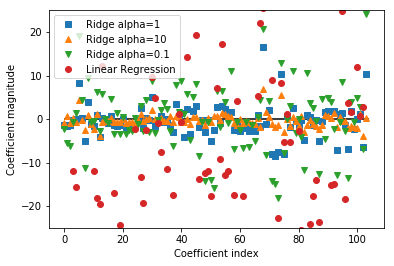

In [47]:
plt.plot(ridge.coef_, 's', label='Ridge alpha=1')
plt.plot(ridge10.coef_, '^', label='Ridge alpha=10')
plt.plot(ridge01.coef_, 'v', label='Ridge alpha=0.1')

plt.plot(lr.coef_, 'o', label='Linear Regression')
plt.xlabel('Coefficient index')
plt.ylabel('Coefficient magnitude')
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

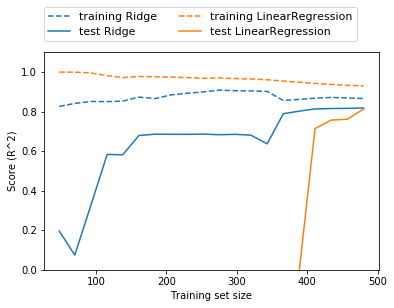

In [48]:
mglearn.plots.plot_ridge_n_samples()

In [49]:
# Because of regularization, ridge training score is always lower than linear regression training score
# When training set is small, ridge does a much better job than linear regression on test set
# With more and more data, regularization becomes less important
# With more data, linear regression training score decrease, because it is getting harder to remember or overfit the traing data

#### Lasso: L1 Regularization

In [50]:
from sklearn.linear_model import Lasso

In [51]:
lasso = Lasso().fit(X_train, y_train)
print('Training set score: {:.2f}'.format(lasso.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(lasso.score(X_test, y_test)))
print('Number of features used: {}'.format(np.sum(lasso.coef_!=0)))

Training set score: 0.29
Test set score: 0.21
Number of features used: 4


In [52]:
# The model performs badly on both the training set and the test set.
# This means the model is likely underfitting

In [53]:
# The parameter alpha of Lasso works roughly the same way of Ridge
# When decreasing alpha, remember to increase max_iter

In [54]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print('Training set score: {:.2f}'.format(lasso001.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(lasso001.score(X_test, y_test)))
print('Number of features used: {}'.format(np.sum(lasso001.coef_!=0)))

Training set score: 0.90
Test set score: 0.77
Number of features used: 33


In [55]:
# We are using only 33 out of 105 features, and get a better score than Ridge.
# Less features makes the model easier to understand

In [56]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print('Training set score: {:.2f}'.format(lasso00001.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(lasso00001.score(X_test, y_test)))
print('Number of features used: {}'.format(np.sum(lasso00001.coef_!=0)))

Training set score: 0.95
Test set score: 0.64
Number of features used: 96


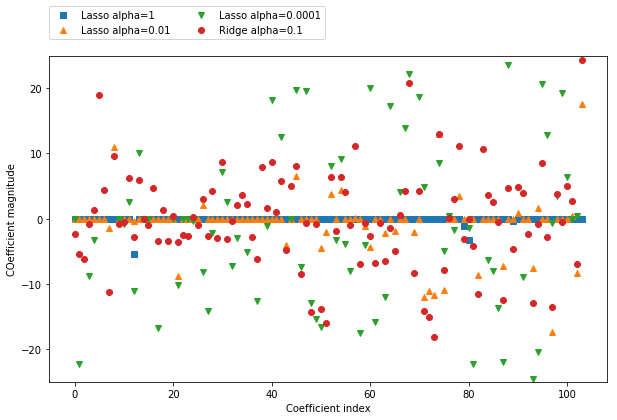

In [57]:
plt.figure(figsize=(10, 6))
plt.plot(lasso.coef_, 's', label='Lasso alpha=1')
plt.plot(lasso001.coef_, '^', label='Lasso alpha=0.01')
plt.plot(lasso00001.coef_, 'v', label='Lasso alpha=0.0001')
plt.plot(ridge01.coef_, 'o', label='Ridge alpha=0.1')
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel('Coefficient index')
plt.ylabel('COefficient magnitude')
plt.show()

In [58]:
# In practice, Ridge is usually the first choice.
# If you have a large amount of feature and only expect a few of them to be important, use Lasso
# If you want a model that is easier to understand, use Lasso
# ElasticNet combines L1 and L2 regularization, usually works the best, but you will get 2 parameters to adjust

#### Linear models for classification

In [59]:
# A linear classifier is a classifier that separates 2 classes using a line, a plane, or a hyperplane
# Different linear classifiers differ in two ways:
# The way in which they measure how well a particular combination of coefficients and intercept fits the training data
# If and what kind of regularization they use

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

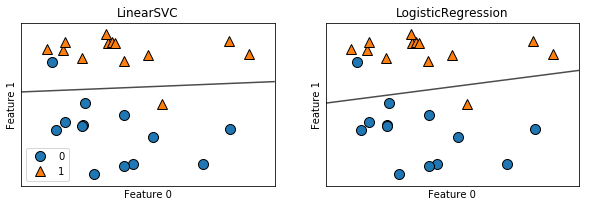

In [61]:
X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))
for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=0.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title('{}'.format(clf.__class__.__name__))
    ax.set_xlabel('Feature 0')
    ax.set_ylabel('Feature 1')
axes[0].legend()

In [62]:
# Parameter C for LogisticRegression and LinearSVC
# Higher value of C means less regularization, thus the coeffcients will be far from zero

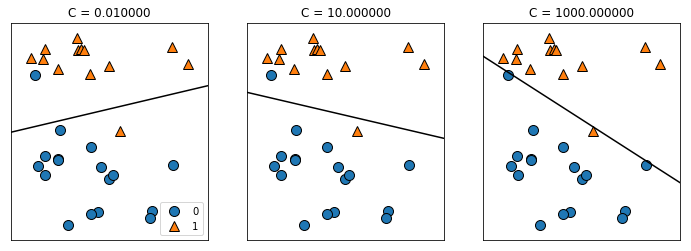

In [63]:
mglearn.plots.plot_linear_svc_regularization()

In [64]:
# Lower value of C ---- more regularization ---- the model adjusts for the majority of data points
# Higher value of C ---- less regularization ---- the model trys to get every single data point right

In [65]:
# Linear classifiers seem to be very restrictive in low-dimensional spaces.
# In high dimensions, linear models become more powerful.
# Also, in high dimensions, guarding againet overfitting becomes increasingly important.

In [66]:
from sklearn.datasets import load_breast_cancer

In [67]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
print('Training set score: {:.3f}'.format(logreg.score(X_train, y_train)))
print('Test set score: {:.3f}'.format(logreg.score(X_test, y_test)))

Training set score: 0.955
Test set score: 0.958


In [68]:
# The scores is not bad, but close scores means we might be underfitting

In [69]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print('Training set score: {:.3f}'.format(logreg100.score(X_train, y_train)))
print('Test set score: {:.3f}'.format(logreg100.score(X_test, y_test)))

Training set score: 0.972
Test set score: 0.965


In [70]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print('Training set score: {:.3f}'.format(logreg001.score(X_train, y_train)))
print('Test set score {:.3f}'.format(logreg001.score(X_test, y_test)))

Training set score: 0.934
Test set score 0.930


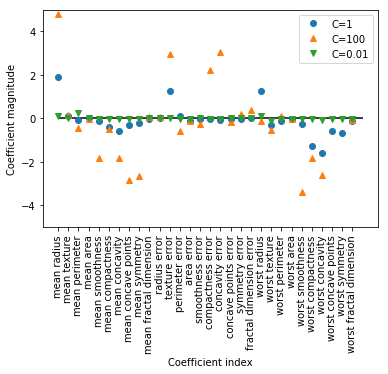

In [71]:
plt.plot(logreg.coef_.T, 'o', label='C=1')
plt.plot(logreg100.coef_.T, '^', label='C=100')
plt.plot(logreg001.coef_.T, 'v', label='C=0.01')
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel('Coefficient index')
plt.ylabel('Coefficient magnitude')
plt.legend()
plt.show()

In [72]:
# Different C makes different coefficients for the same feature, even the sign of it can be different
# This means the coefficents of a linear model should always be taken with a grain of salt.
# The models used above use L2 regularization by default, if we want a more interpretable model, using L1 regularization might help.

Training accuracy of l1 logreg with C=0.001: 0.91
Test accuracy of l1 logreg with C=0.001: 0.92
Training accuracy of l1 logreg with C=1.000: 0.96
Test accuracy of l1 logreg with C=1.000: 0.96
Training accuracy of l1 logreg with C=100.000: 0.99
Test accuracy of l1 logreg with C=100.000: 0.98


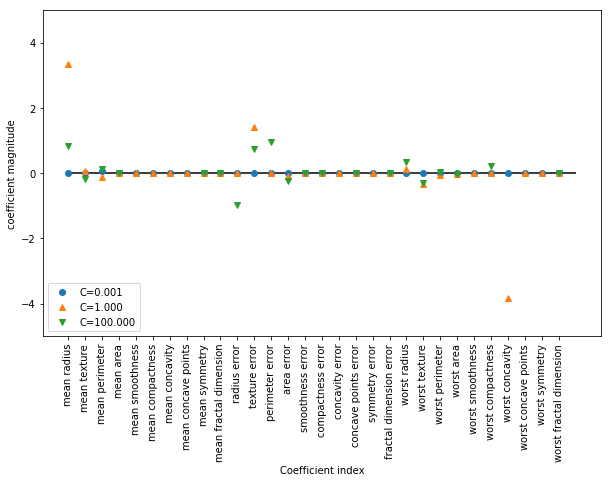

In [73]:
plt.figure(figsize=(10, 6))
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty='l1').fit(X_train, y_train)
    print('Training accuracy of l1 logreg with C={:.3f}: {:.2f}'.format(C, lr_l1.score(X_train, y_train)))
    print('Test accuracy of l1 logreg with C={:.3f}: {:.2f}'.format(C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label='C={:.3f}'.format(C))
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.xlabel('Coefficient index')
plt.ylabel('coefficient magnitude')
plt.ylim(-5, 5)
plt.legend(loc=3)
plt.show()

#### Linear models for multiclass classification: one-vs.-rest

In [74]:
from sklearn.datasets import make_blobs

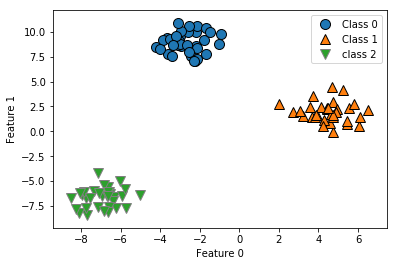

In [75]:
X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.legend(['Class 0', 'Class 1', 'class 2'])
plt.show()

In [76]:
linear_svm = LinearSVC().fit(X, y)
print('Coefficient shape: ', linear_svm.coef_.shape)
print('Intercept shape: ', linear_svm.intercept_.shape)

Coefficient shape:  (3, 2)
Intercept shape:  (3,)


In [77]:
# Each row of coef_ contains the coefficient vector of a one of the 3 classes.
# Each columns holds the coefficient value for a specific feature.
# The intercept stores the intercepts for each class.

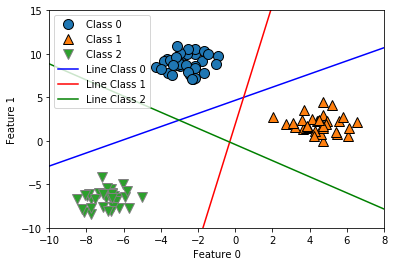

In [78]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, ['b', 'r', 'g']):
    plt.plot(line, - (line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line Class 0', 'Line Class 1', 'Line Class 2'], loc='best')
plt.show()

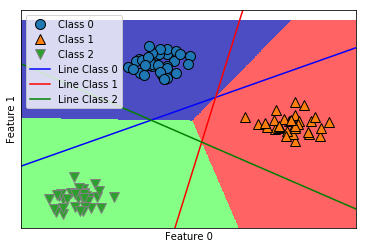

In [79]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=0.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, ['b', 'r', 'g']):
    plt.plot(line, - (line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line Class 0', 'Line Class 1', 'Line Class 2'], loc='best')
plt.show()

Strengths, weaknesses, and parameters:
* fast to train and predict
* scale to very large datasets
* work well with sparse data
* solver = 'sag' for Logisticregression and Ridge can be faster when dealing with large datasets(100000+samples)
* easy to understand how a prediction is made
* it is not entirely clear why coefficients are the way they are
* the coefficient can be hard to interpret when there are highly correlated features

In [80]:
# Linear models perform well when the number of features is large compare to the number of samples.
# They are often used on very large datasets, simply because it's not feasible to train other models.
# In lower-dimensional spaces, other models might give better results.

### Naive bayes classifiers

Naive bayes classifier is quite similar to linear models. However, they tend to be faster in training and generalize slightly worse. The reason why they are faster is that they learn parameters by looking at each feature individually and collect simple per-class statistics from each feature.

Three kinds od Naive Bayes Classifier in sklearn:
* GaussianNB: can be applied to any continuous data
* BernoulliNB: assumes binary data
* MultinomialNB: assumes count data

BernoulliNB and MultinomialNB are mostly used in text data classification.

In [81]:
# The BernoulliNB classifier counts how often every feature of each class is not zero

In [82]:
X = np.array([
    [0, 1, 0, 1],
    [1, 0, 1, 1],
    [0, 0, 0, 1],
    [1, 0, 1, 0]
])
y = np.array([0, 1, 0, 1])

In [83]:
counts = {}
for label in np.unique(y):
    counts[label] = X[y==label].sum(axis=0)
print('Feature counts: \n{}'.format(counts))

Feature counts: 
{0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


In [84]:
# MultinomialNB takes into account the average value of each feature for each class.
# GaussianNB stores the average as well as the standard deviation of each feature for each class.
# To make a prediction, a data point is compared to the statistics for each of the classes and the best matching class is predicted.
# For both MultinomialNB and BerboulliNB, the prediction formula turns out to be the same with linear classifiers.
# But GaussianNB is a little bit different.

strengths, weaknesses, and parameters:
* alpha for smoothing in MultinomialNB and BernoulliNB classifier
* alpha is not critical for good performance, but tuning it usually improves accuracy a little.
* GaussianNB is mostly used on very high-dimensional data, while the other two variants are widely used for sparse count data such as text.
* MultinomialNB usually outperforms BernoulliNB, particularly on datasets with a relatively large number of nonzero features(i.e., large documents).

* fast to train and to predict, even faster than linear models
* the training process is easy to understand
* works well with high-dimentional datasets
* relatively robust to the parameters
* great baseline models
* often used on very large datasets, when training even a linear model might take too long.

### Decision tree: hierarchy questions which lead to decision

In [85]:
import os

In [86]:
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

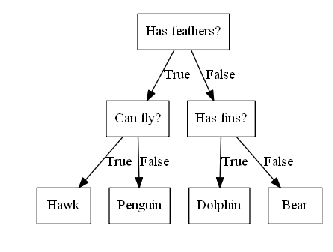

In [87]:
mglearn.plots.plot_animal_tree()

In [88]:
# Learning a decision tree means learning the squence of if/else questions(tests) to the true answer most quickly.
# The questions for continuous data are of the form "is feature i larger than value a?"
# To build a tree, the algorithm searches over all possible tests and find the one that is most informative about the target variable.
# The recursive partitioning of the data is repeated until each region in the partition(each leaf in the tree) is pure.
# When using decision tree for regression, we build the tree in the same way and use the mean in leaf node as prediction.

In [89]:
# Decision tree without controlling complexity will easily overfit the training data.
# For complexity control, sklearn implements pre-pruning

In [90]:
from sklearn.tree import DecisionTreeClassifier

In [91]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
print('Accuracy on training set: {:.3f}'.format(tree.score(X_train, y_train)))
print('Accuracy on test set: {:.3f}'.format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.937


In [92]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0).fit(X_train, y_train)
print('Accuracy on training set: {:.3f}'.format(tree.score(X_train, y_train)))
print('Accuracy on test set: {:.3f}'.format(tree.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.951


In [93]:
# to visualize the tree

In [94]:
from sklearn.tree import export_graphviz

In [95]:
export_graphviz(
    tree, 
    out_file='tree.dot', 
    class_names=['malignant', 'benign'],
    feature_names=cancer.feature_names,
    impurity=False,
    filled=True
)

In [96]:
import graphviz

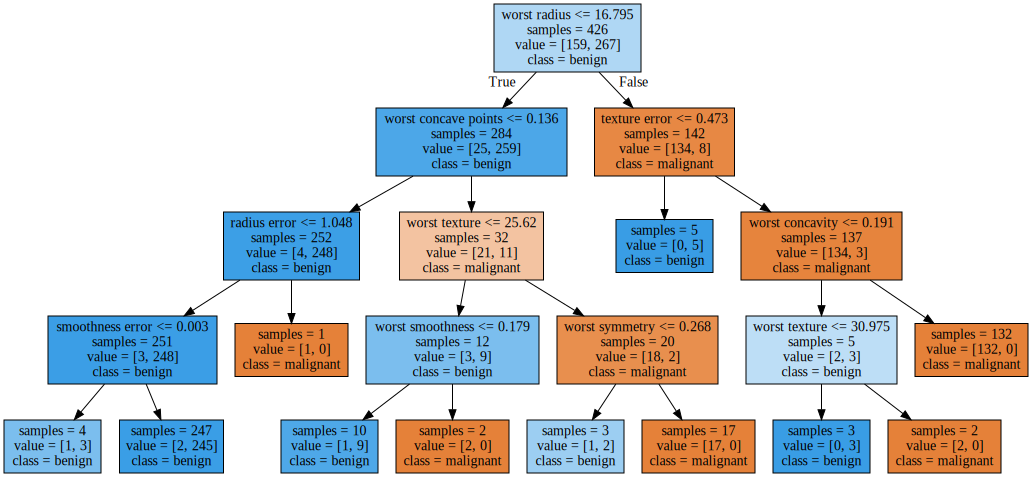

In [97]:
with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [98]:
print('Feature importance:\n{}'.format(tree.feature_importances_))

Feature importance:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


In [99]:
def plot_feature_importance_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')
    plt.show()

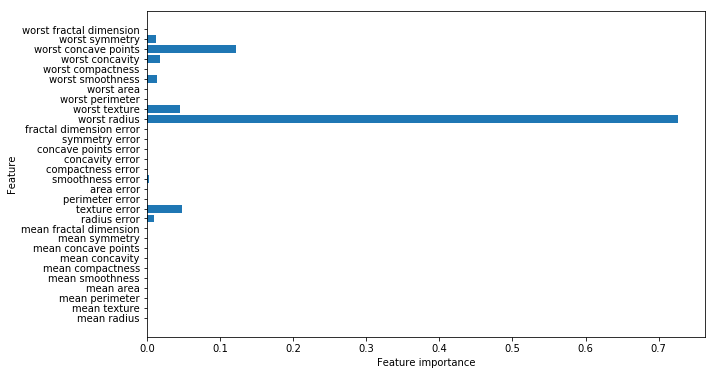

In [100]:
plt.figure(figsize=(10, 6))
plot_feature_importance_cancer(tree)
plt.show()

In [101]:
# A feature with high feature importance is informative.
# However, if a feature has a low feature_importance, it doesn't mean that this feature is uninformative,
# it only means that the feature was not picked by the tree,
# likely another feature encodes the same information.

In [102]:
# Decision tree's feature importances are always positive.
# It only tells you which feature is imformative, but not the relationship between this feature and the target, which can be complicated.

Feature importances: [0. 1.]


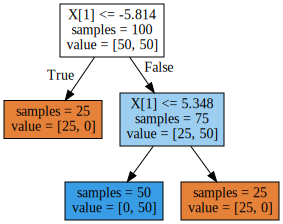

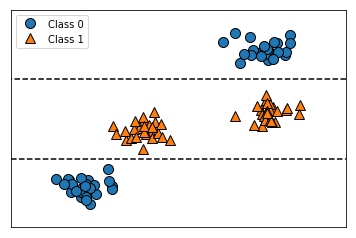

In [103]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

In [104]:
# When doing regression, the DecisionTreeRegression is not able to make predictions outside the range of the training data

In [105]:
import pandas as pd

In [106]:
ram_prices = pd.read_csv('./data/ram_price.csv')

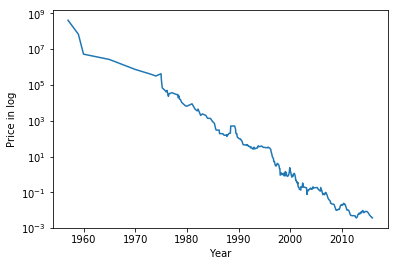

In [107]:
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel('Year')
plt.ylabel('Price in log')
plt.show()

In [108]:
# Note the logarithmic scale of the y-axis. 
# When plotting logarithmically, the relation seems to be quite linear and so should be relatively easy to predict.

In [109]:
from sklearn.tree import DecisionTreeRegressor

In [110]:
data_train = ram_prices[ram_prices.date<2000]
data_test = ram_prices[ram_prices.date>=2000]

X_train = data_train.date[:, np.newaxis]
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

X_all = ram_prices.date[:, np.newaxis]
pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

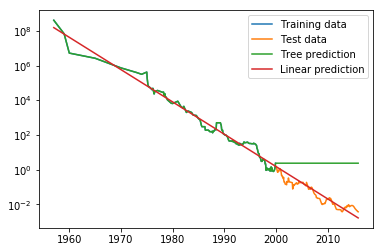

In [111]:
plt.semilogy(data_train.date, data_train.price, label='Training data')
plt.semilogy(data_test.date, data_test.price, label='Test data')
plt.semilogy(ram_prices.date, price_tree, label='Tree prediction')
plt.semilogy(ram_prices.date, price_lr, label='Linear prediction')
plt.legend()
plt.show()

In [112]:
# The trees has no ability to generate 'new' response, outside of what was seen in the training data.
# This shortcoming applies to all models based on trees.

strengths, weaknesses, and parameters:
* pre-pruning parameters: max_depth, max_leaf_nodes, min_samples_leaf ...
* can easily be visualized and understood bu nonexperts
* the algorithms are completely invariant to scaling of the data
* no preprocessing like normalization or standardization of features is needed
* works well when you have features that are on completely different scales, or a mix of binary and continuous features
* the main downside is that even with pre-pruning, trees tend to overfit, so ensemble methods are usually used in place of a single tree

### Ensembles of Decision Trees

Two ensemble methods that have proven to be effective on a wide range of datasets for classification and regression:
* Random forests
* gradient boosting decision trees

#### Random forests

In [113]:
# The idea: each tree might do a relatively good job for predicting, but will likely overfit on part of the data.
# If we build many trees, all of which work well and overfit on part of the data, we can reduce the amount of overfitting by averaging their results.
# To implement this strategy, we need to build many decision trees. Each tree should do an acceptable job of predicting the target,
# and should also be different from the other trees.

In [114]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

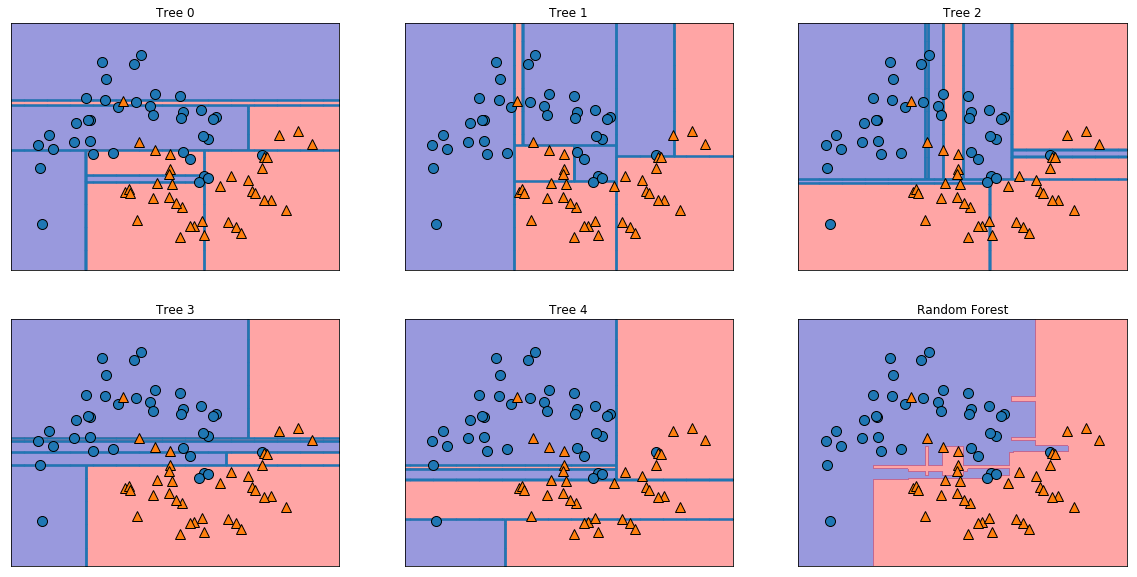

In [115]:
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
forest = RandomForestClassifier(n_estimators=5, random_state=2).fit(X_train, y_train)

fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title('Tree {}'.format(i))
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)
mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1], alpha=0.4)
axes[-1, -1].set_title('Random Forest')
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.show()

In [116]:
# The random forest overfits less than any of the trees individually, and provieds a much more intuitive decision boundary.
# In real application, we would use many more trees(ofter hundreds or thousands), leading to even smoother boundaries.

In [117]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0).fit(X_train, y_train)
print('Accuracy on training set: {:.3f}'.format(forest.score(X_train, y_train)))
print('Accuracy on test set: {:.3f}'.format(forest.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.972


In [118]:
# Typically, the feature importances provided by random forest are more reliable than the ones proviede by a single tree.
# The randomness in building forces the algorithm to consider many possible explanations,
# The result being that the random forest captures a much broader picture of the data than a single tree.

strength, weakness, and parameters
* often works well without heavy tuning of the parameters
* don't require scaling of the data
* share all of the benefits of decision trees, while making up for some of their deficiencies
* hard to present so many trees to others
* time consuming, but paralle computing is allowed
* randomness, different random_state can result in pretty different performance
* the more trees, the more robust random forest will be against random_state changes
* don't perform well on high-dimension, sparse data, linear model, in this case, might be better
* n_esitmators: more is better, until it take too much ram or too much time
* pre-puning parameters: max_depth, min_sample_leaf ...
* important: max_features
* adding max_feature and max_leaf_nodes might sometimes improve performance, it can also drastically reduce space and time requirements for training and predicting